<a href="https://colab.research.google.com/github/ibribr/DT8807/blob/master/visualize_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') #ggplot object

In [52]:
# load your multi-class classification dataset
from sklearn import datasets

iris = datasets.load_iris()
x = iris.data
y = iris.target

input_names = iris['feature_names']
print(input_names)


target_names = iris.get('target_names')
target_names = iris['target_names']
print(target_names)
for name in enumerate(target_names):
  print(name)

print(x.shape)
print(y.shape)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(0, 'setosa')
(1, 'versicolor')
(2, 'virginica')
(150, 4)
(150,)


0 setosa
1 versicolor
2 virginica


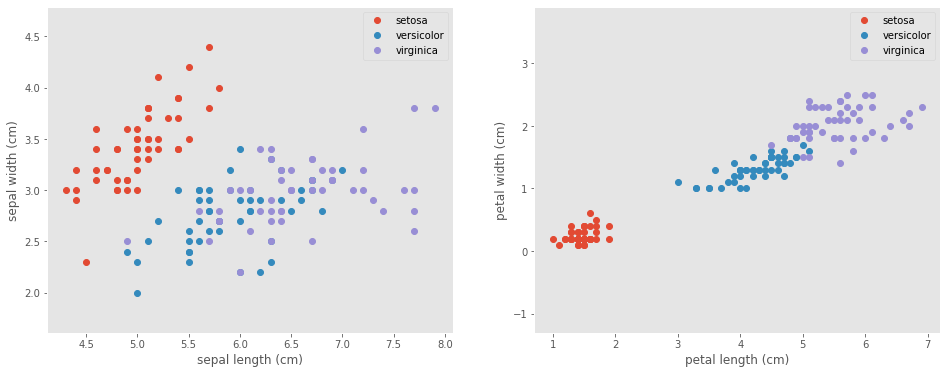

In [53]:
# Visualize the data sets
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(target_names):
    print(target, target_name)
    X_plot = x[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(input_names[0])
plt.ylabel(input_names[1])
plt.axis('equal')
plt.grid()
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = x[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(input_names[2])
plt.ylabel(input_names[3])
plt.axis('equal')
plt.grid()
plt.legend();

In [54]:
# build my first model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# one hot encloding 
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
print(y[0,:])
print(y[50,:])
print(y[100,:])
print(y.shape)

# define min max scaler to scale your data from 0 to 1
scaler = MinMaxScaler()
# transform data
x_scaled = scaler.fit_transform(x)
print(x_scaled)

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_scaled)
print(x_scaled)

# Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.5, random_state=2)

n_features = x.shape[1]
n_classes = y.shape[1]
print(n_features, n_classes)

[1. 0. 0.]
[0. 1. 0.]
[0. 0. 1.]
(150, 3)
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.583

In [59]:
# Import Keras modules
from keras import models
from keras import layers

# Create the network
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(n_features,)))
model.add(layers.Dense(n_classes, activation='softmax'))

# Compile the network
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

#try: optimizer='adam', loss='sparse_categorical_crossentropy'

# Fit the neural network
model.fit(x_train, y_train, epochs=20, batch_size=40, verbose=1, validation_data=(x_test, y_test))

# Get the accuracy of test data set
test_loss, test_acc = model.evaluate(x_test, y_test,  verbose = 1)

# Print the test accuracy
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss)

Epoch 1/20
2/2 [==============================] - 1s 116ms/step - loss: 1.1360 - accuracy: 0.2400 - val_loss: 1.1033 - val_accuracy: 0.3333
Epoch 2/20
2/2 [==============================] - 0s 18ms/step - loss: 1.0914 - accuracy: 0.3600 - val_loss: 1.0584 - val_accuracy: 0.4800
Epoch 3/20
2/2 [==============================] - 0s 17ms/step - loss: 1.0464 - accuracy: 0.5600 - val_loss: 1.0154 - val_accuracy: 0.5867
Epoch 4/20
2/2 [==============================] - 0s 18ms/step - loss: 1.0055 - accuracy: 0.6267 - val_loss: 0.9735 - val_accuracy: 0.7333
Epoch 5/20
2/2 [==============================] - 0s 17ms/step - loss: 0.9639 - accuracy: 0.6933 - val_loss: 0.9335 - val_accuracy: 0.7733
Epoch 6/20
2/2 [==============================] - 0s 16ms/step - loss: 0.9255 - accuracy: 0.7333 - val_loss: 0.8949 - val_accuracy: 0.7867
Epoch 7/20
2/2 [==============================] - 0s 18ms/step - loss: 0.8889 - accuracy: 0.7733 - val_loss: 0.8580 - val_accuracy: 0.8267
Epoch 8/20
2/2 [==========